In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from numpy import asarray
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [25]:
# Read given data-set using pandas

text_data = pd.read_csv("nb_ok1.csv",encoding= 'unicode_escape')
print("Shape of text_data : ", text_data.shape)
text_data.head(3)

Shape of text_data :  (493, 11)


,HeatNo,Moisture,Permeability,Binder,PouringTemp,GFN,MoldHardness,GreenStrength,Blow,Penetra,Erosion
0,DM001,3.4,94,8.8,1280,40,70.0,12.0,0.45,0.58,0.20
1,DM002,3.4,91,8.8,1280,40,70.0,12.5,0.45,0.58,0.23
2,DM003,3.4,93,8.8,1280,40,70.0,12.0,0.45,0.58,0.20


In [26]:
text_data.columns

Index(['HeatNo', 'Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN',
       'MoldHardness', 'GreenStrength', 'Blow', 'Penetra', 'Erosion'],
      dtype='object')

In [27]:
text_data.drop('HeatNo', axis=1,inplace = True)

In [28]:
text_data.drop('Penetra', axis=1,inplace = True)

In [29]:
text_data.drop('Erosion', axis=1,inplace = True)

In [30]:
text_data.head(3)

,Moisture,Permeability,Binder,PouringTemp,GFN,MoldHardness,GreenStrength,Blow
0,3.4,94,8.8,1280,40,70.0,12.0,0.45
1,3.4,91,8.8,1280,40,70.0,12.5,0.45
2,3.4,93,8.8,1280,40,70.0,12.0,0.45


In [31]:
text_data.isnull().sum()

Moisture         0
Permeability     0
Binder           0
PouringTemp      0
GFN              0
MoldHardness     0
GreenStrength    0
Blow             0
dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


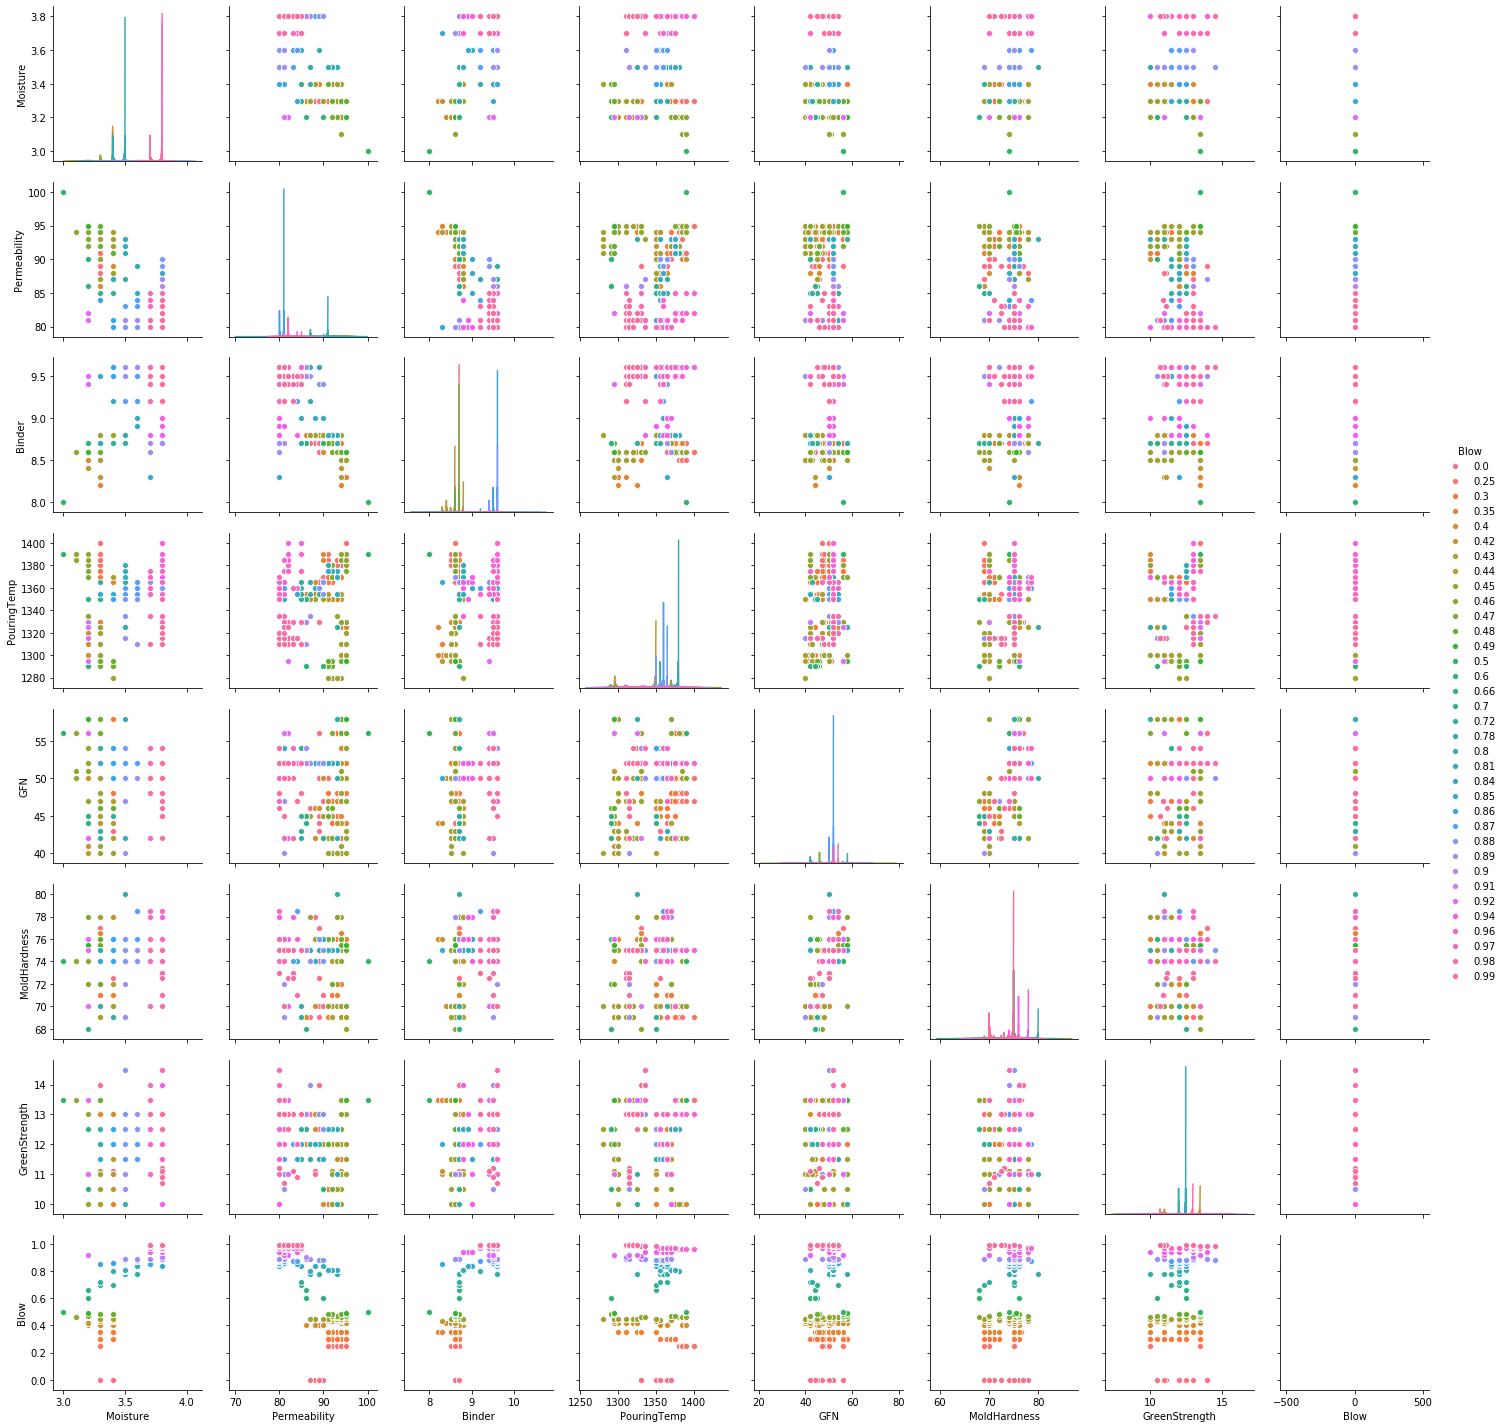

In [32]:
sns.pairplot(text_data,hue='Blow')

In [33]:
X = text_data.drop(columns = ['Blow'])
y = text_data['Blow']

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:
y = y.reshape(-1,1)
y.shape

(493, 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(394, 7)
(99, 7)


In [37]:
from sklearn.ensemble import RandomForestRegressor
  

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [38]:
accuracy_RandomForest = clf.score(X_test,y_test)
accuracy_RandomForest

0.9838646669075208

In [39]:
prediction = clf.predict(X)
prediction2 =  prediction.reshape(-1,1)
print(prediction2.shape)
# Get Unique_ID and similarity

final_score = pd.DataFrame(prediction2)
final_score.head(3) 
final_score.to_csv('final_score.csv',index=False)

(493, 1)


IMPORTANT FEATURE FOR BLOW

In [40]:
feature_names = ['Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN',
       'MoldHardness', 'GreenStrength']
print(feature_names)

['Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN', 'MoldHardness', 'GreenStrength']


In [41]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Moisture         0.660307
Permeability     0.186828
Binder           0.119544
PouringTemp      0.029531
GreenStrength    0.001998
GFN              0.001203
MoldHardness     0.000589
dtype: float64

No handles with labels found to put in legend.


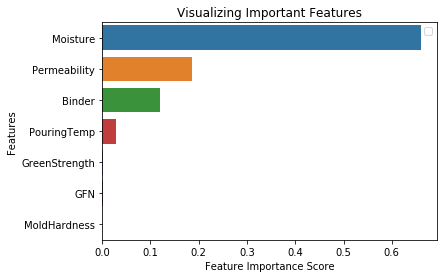

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

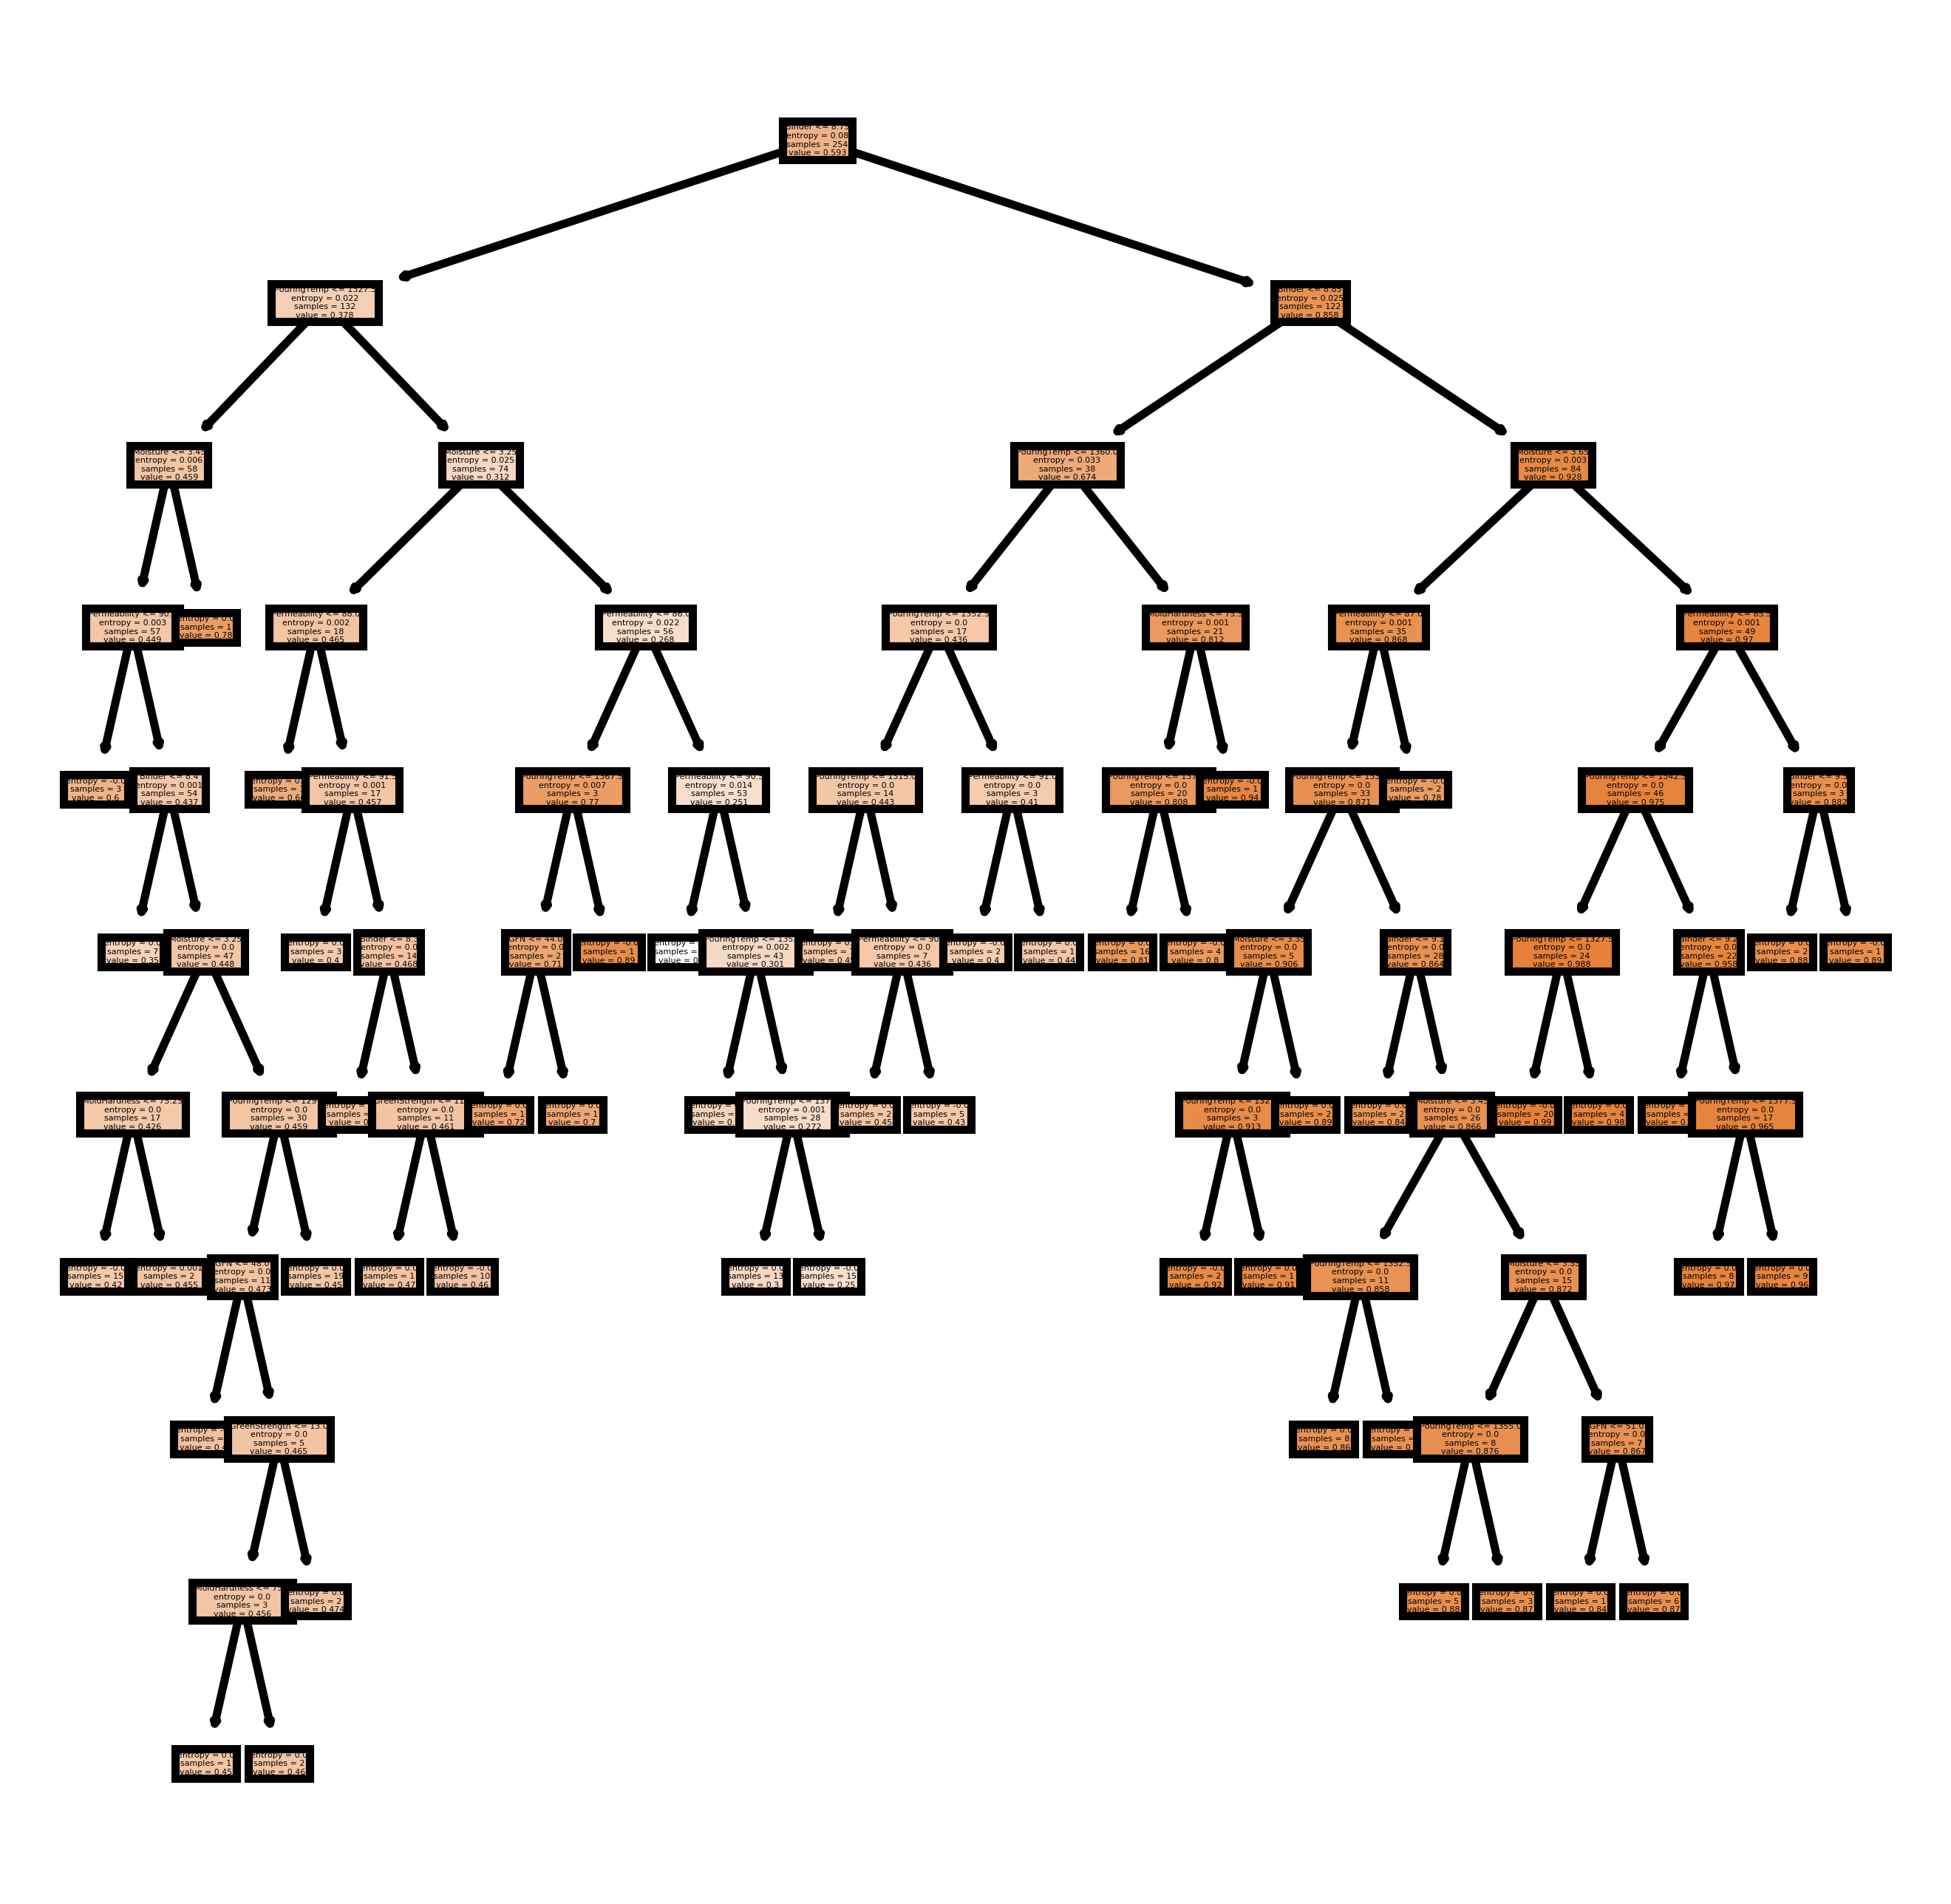

In [43]:
from sklearn import tree
estimator = clf.estimators_[5]
target= ['Penetra']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = feature_names, 
               class_names=target,
               filled = True);
fig.savefig('clf_individualtree.png')

Penetra

In [44]:
text_data = pd.read_csv("nb_ok1.csv",encoding= 'unicode_escape')

In [45]:
text_data.drop('HeatNo', axis=1,inplace = True)
text_data.drop('Blow', axis=1,inplace = True )
text_data.drop('Erosion', axis=1,inplace = True)
X = text_data.drop(columns = ['Penetra'])
y = text_data['Penetra']
X.shape
y.shape

(493,)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


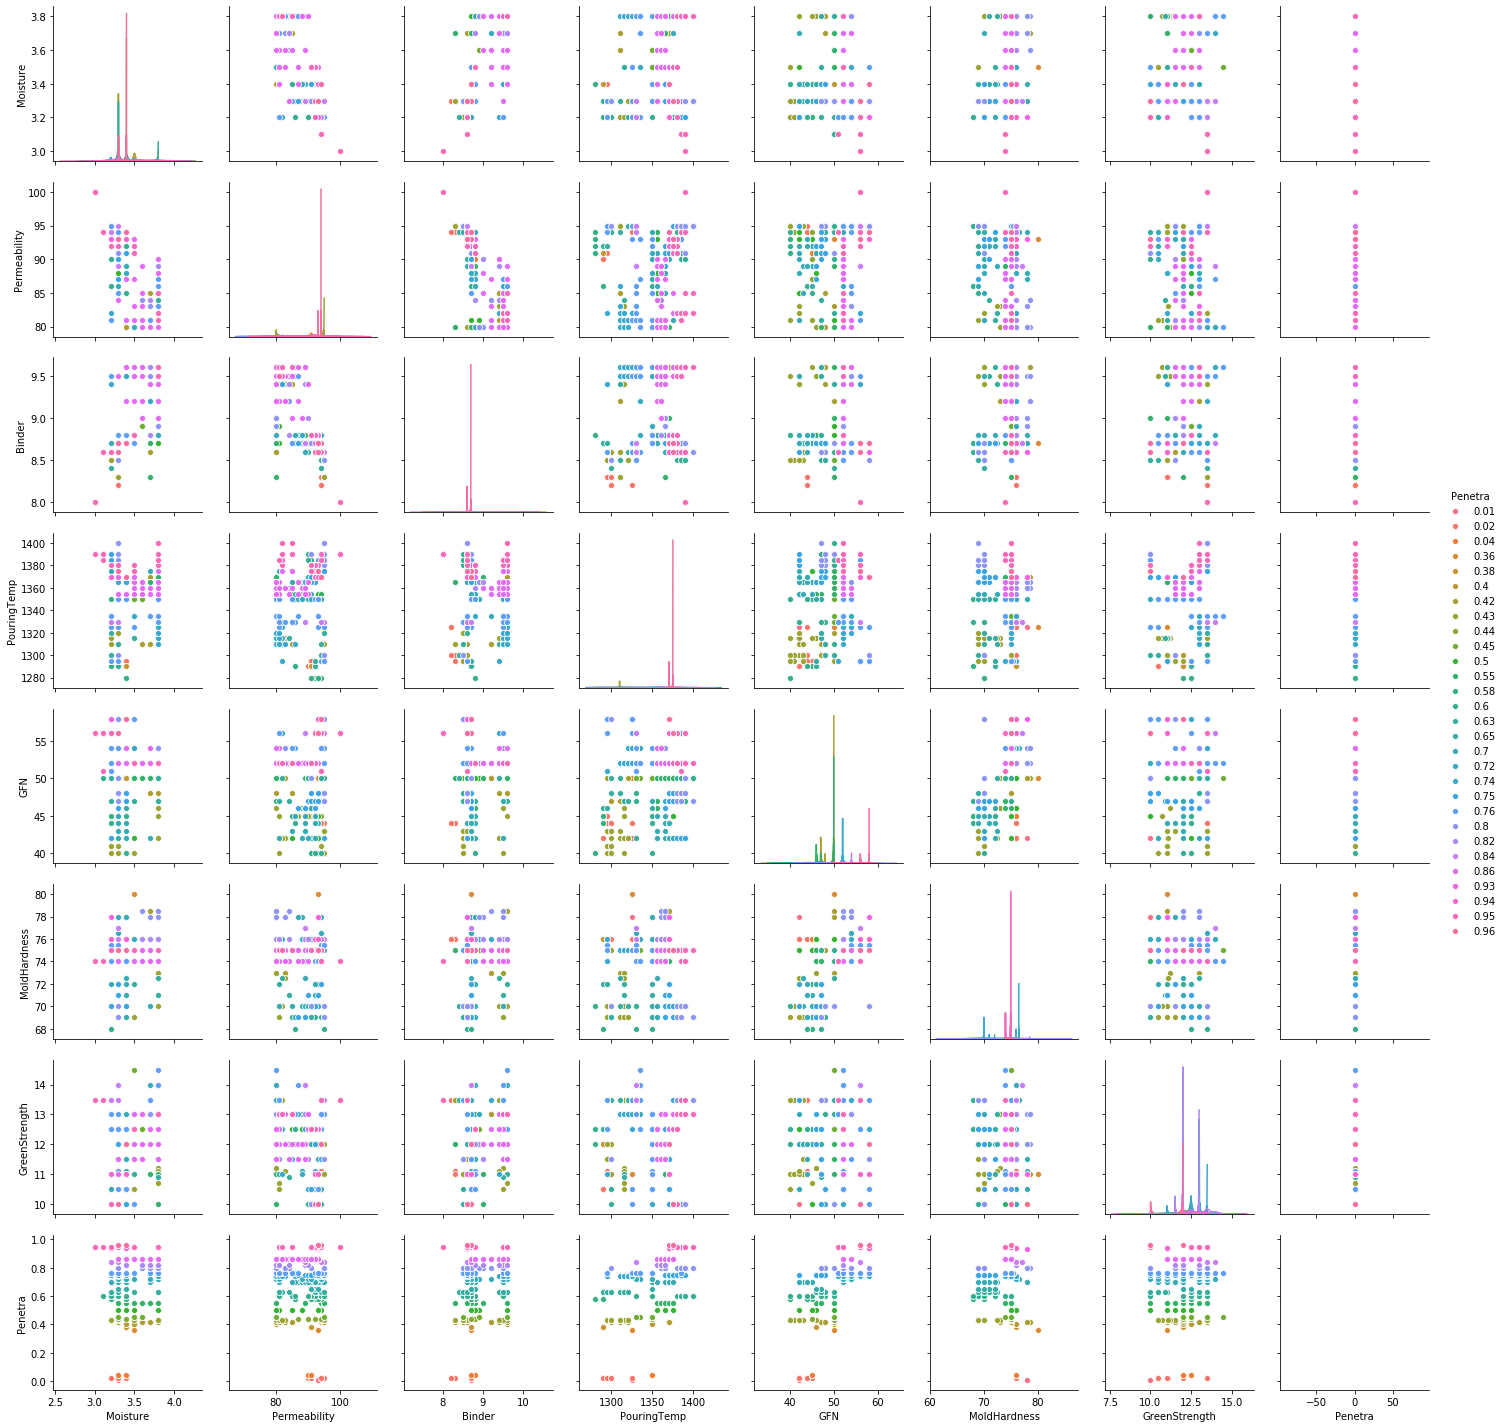

In [46]:
sns.pairplot(text_data,hue='Penetra')

In [47]:
X = np.array(X)
y = np.array(y)

In [48]:
y = y.reshape(-1,1)
y.shape

(493, 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(394, 7)
(99, 7)


In [50]:
from sklearn.ensemble import RandomForestRegressor
  

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [51]:
accuracy_RandomForest = clf.score(X_test,y_test)
accuracy_RandomForest

0.9786056427857166

In [52]:
prediction1 = clf.predict(X)
prediction2 =  prediction1.reshape(-1,1)
print(prediction2.shape)
# Get Unique_ID and similarity

final_score = pd.DataFrame(prediction2)
final_score.head(3) 
final_score.to_csv('final_score.csv',index=False)

(493, 1)


IMPORTANT FEATURE FOR PENETRA

In [53]:
feature_names = ['Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN',
       'MoldHardness', 'GreenStrength']
print(feature_names)

['Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN', 'MoldHardness', 'GreenStrength']


In [54]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

GFN              0.642004
MoldHardness     0.220568
PouringTemp      0.123078
Permeability     0.006512
Binder           0.004770
GreenStrength    0.002220
Moisture         0.000848
dtype: float64

No handles with labels found to put in legend.


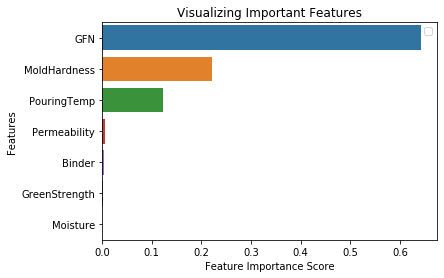

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

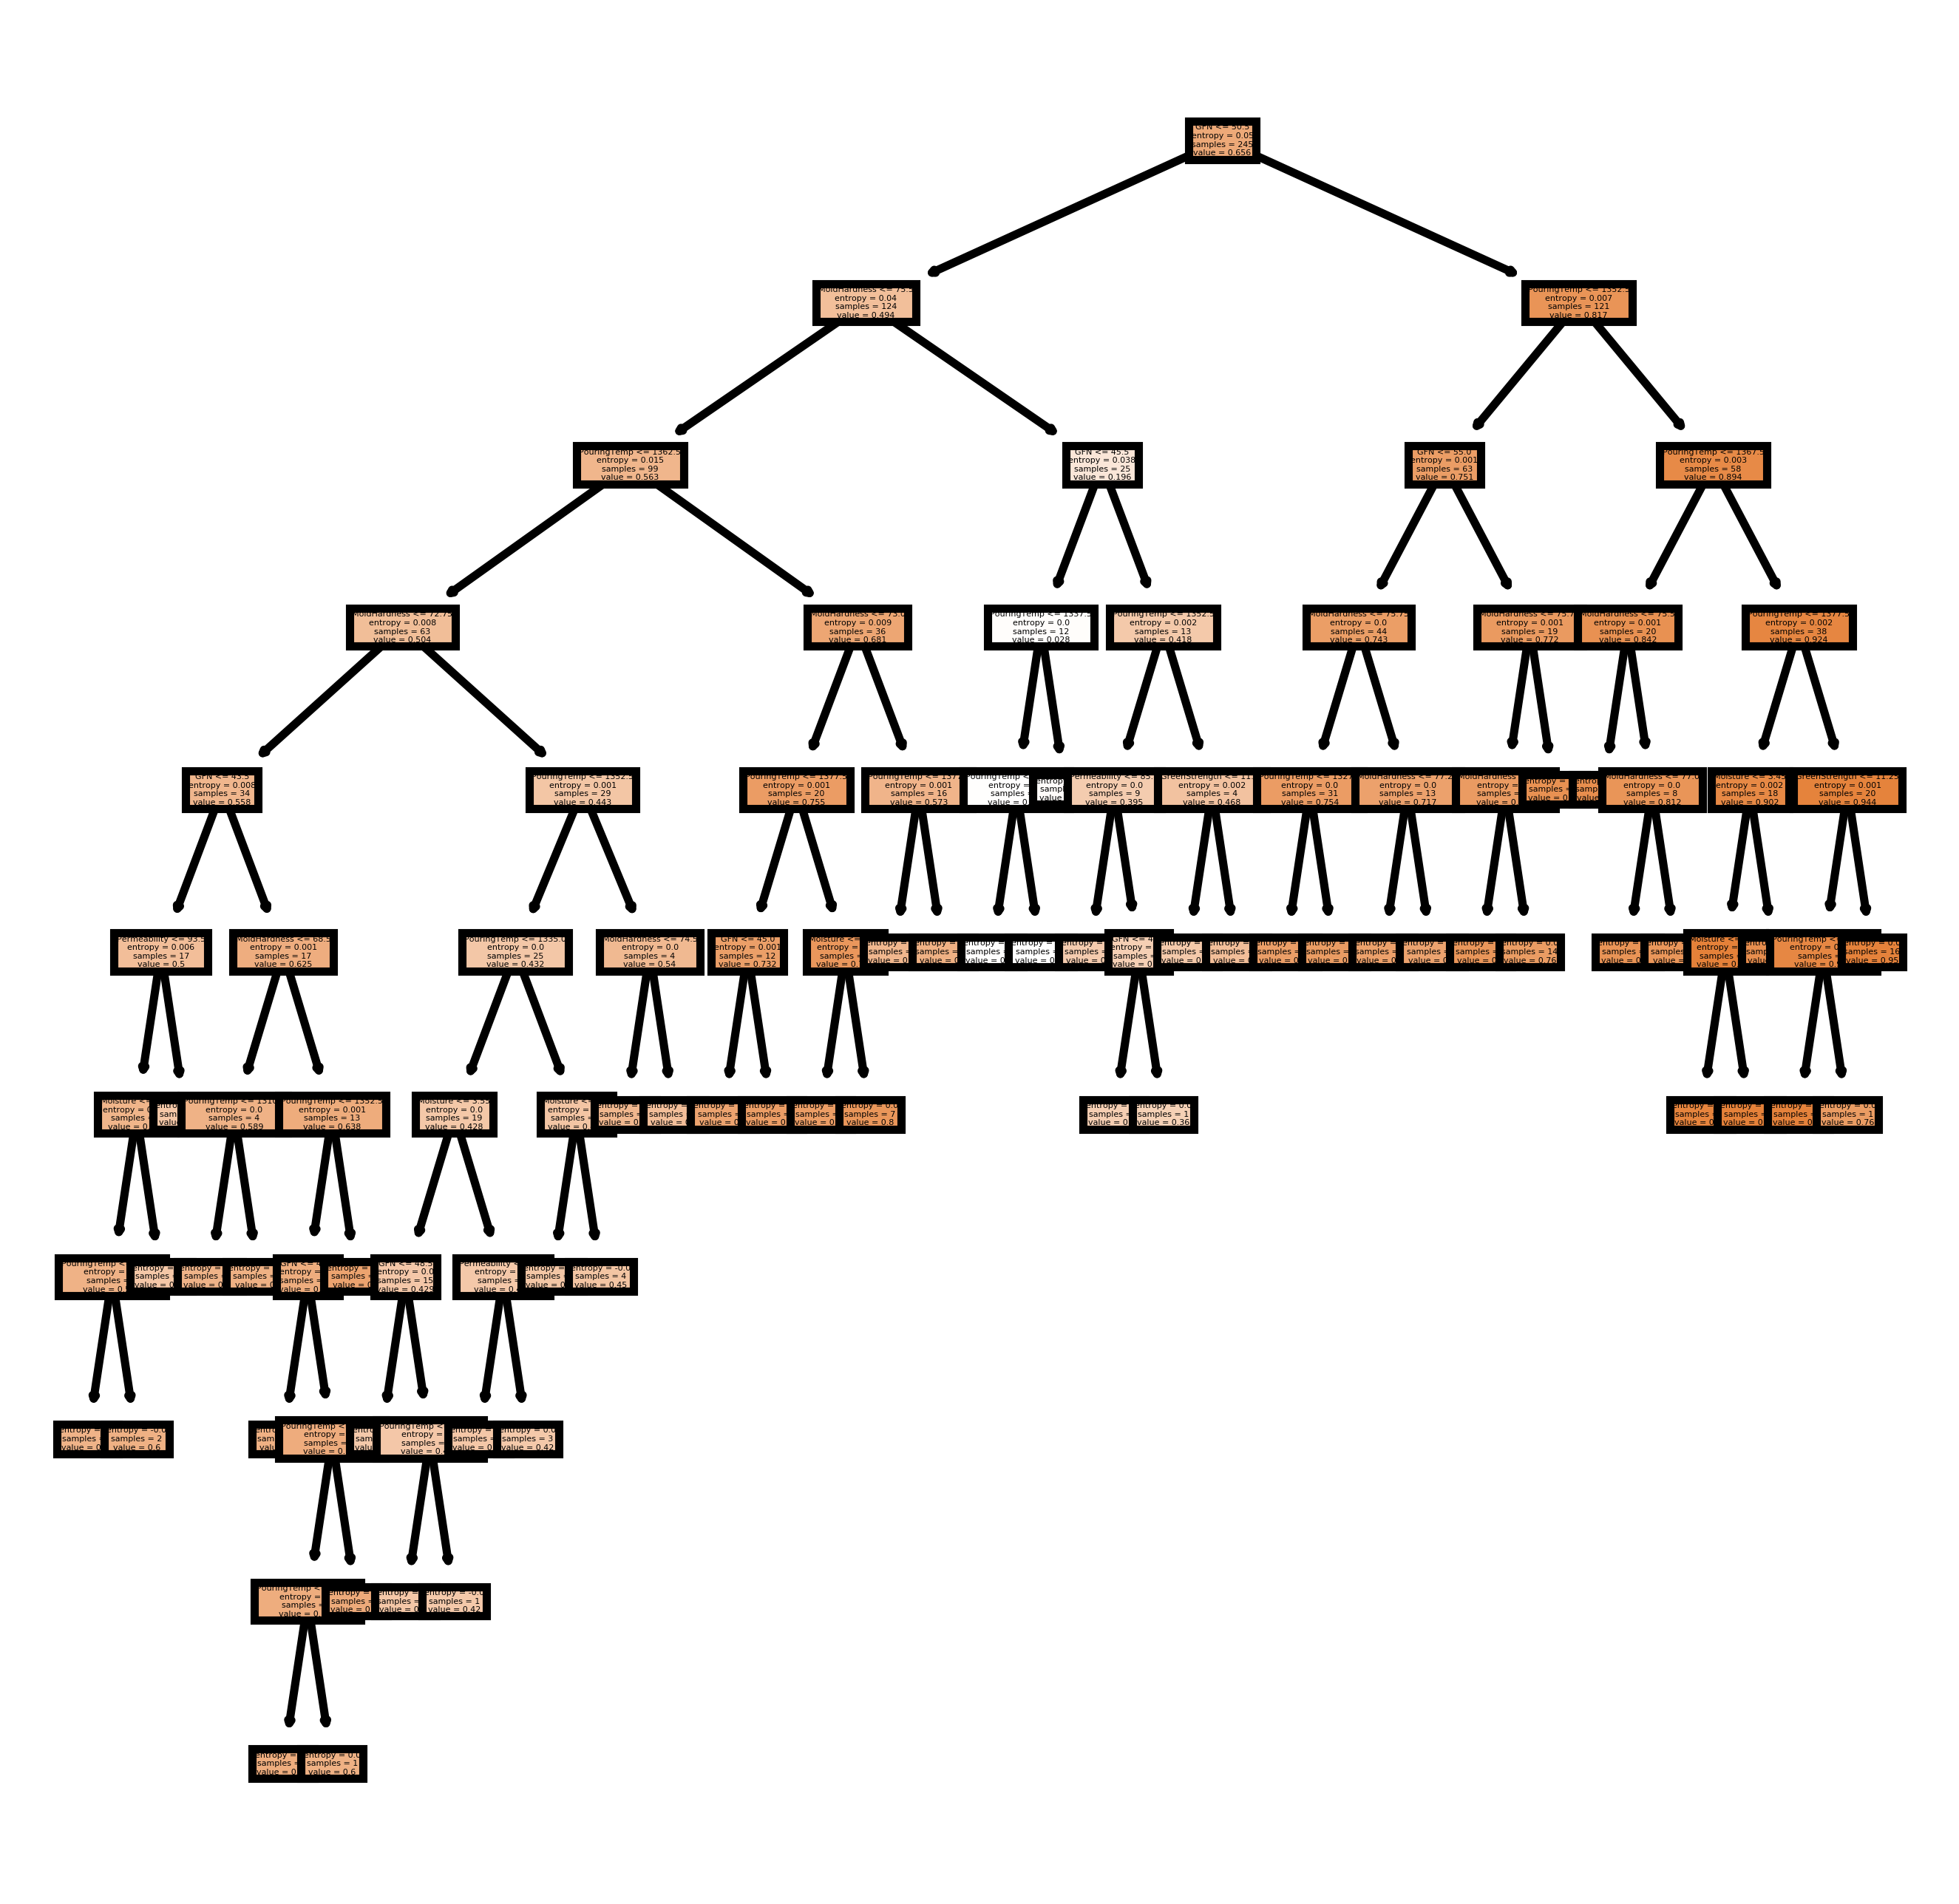

In [56]:
from sklearn import tree
estimator = clf.estimators_[5]
target= ['Penetra']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = feature_names, 
               class_names=target,
               filled = True);
fig.savefig('clf_individualtree.png')

Erosion

In [57]:
text_data = pd.read_csv("nb_ok1.csv",encoding= 'unicode_escape')

In [58]:
text_data.drop('HeatNo', axis=1,inplace = True)
text_data.drop('Blow', axis=1,inplace = True )
text_data.drop('Penetra', axis=1,inplace = True)
X = text_data.drop(columns = ['Erosion'])
y = text_data['Erosion']
X.shape
y.shape

(493,)

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


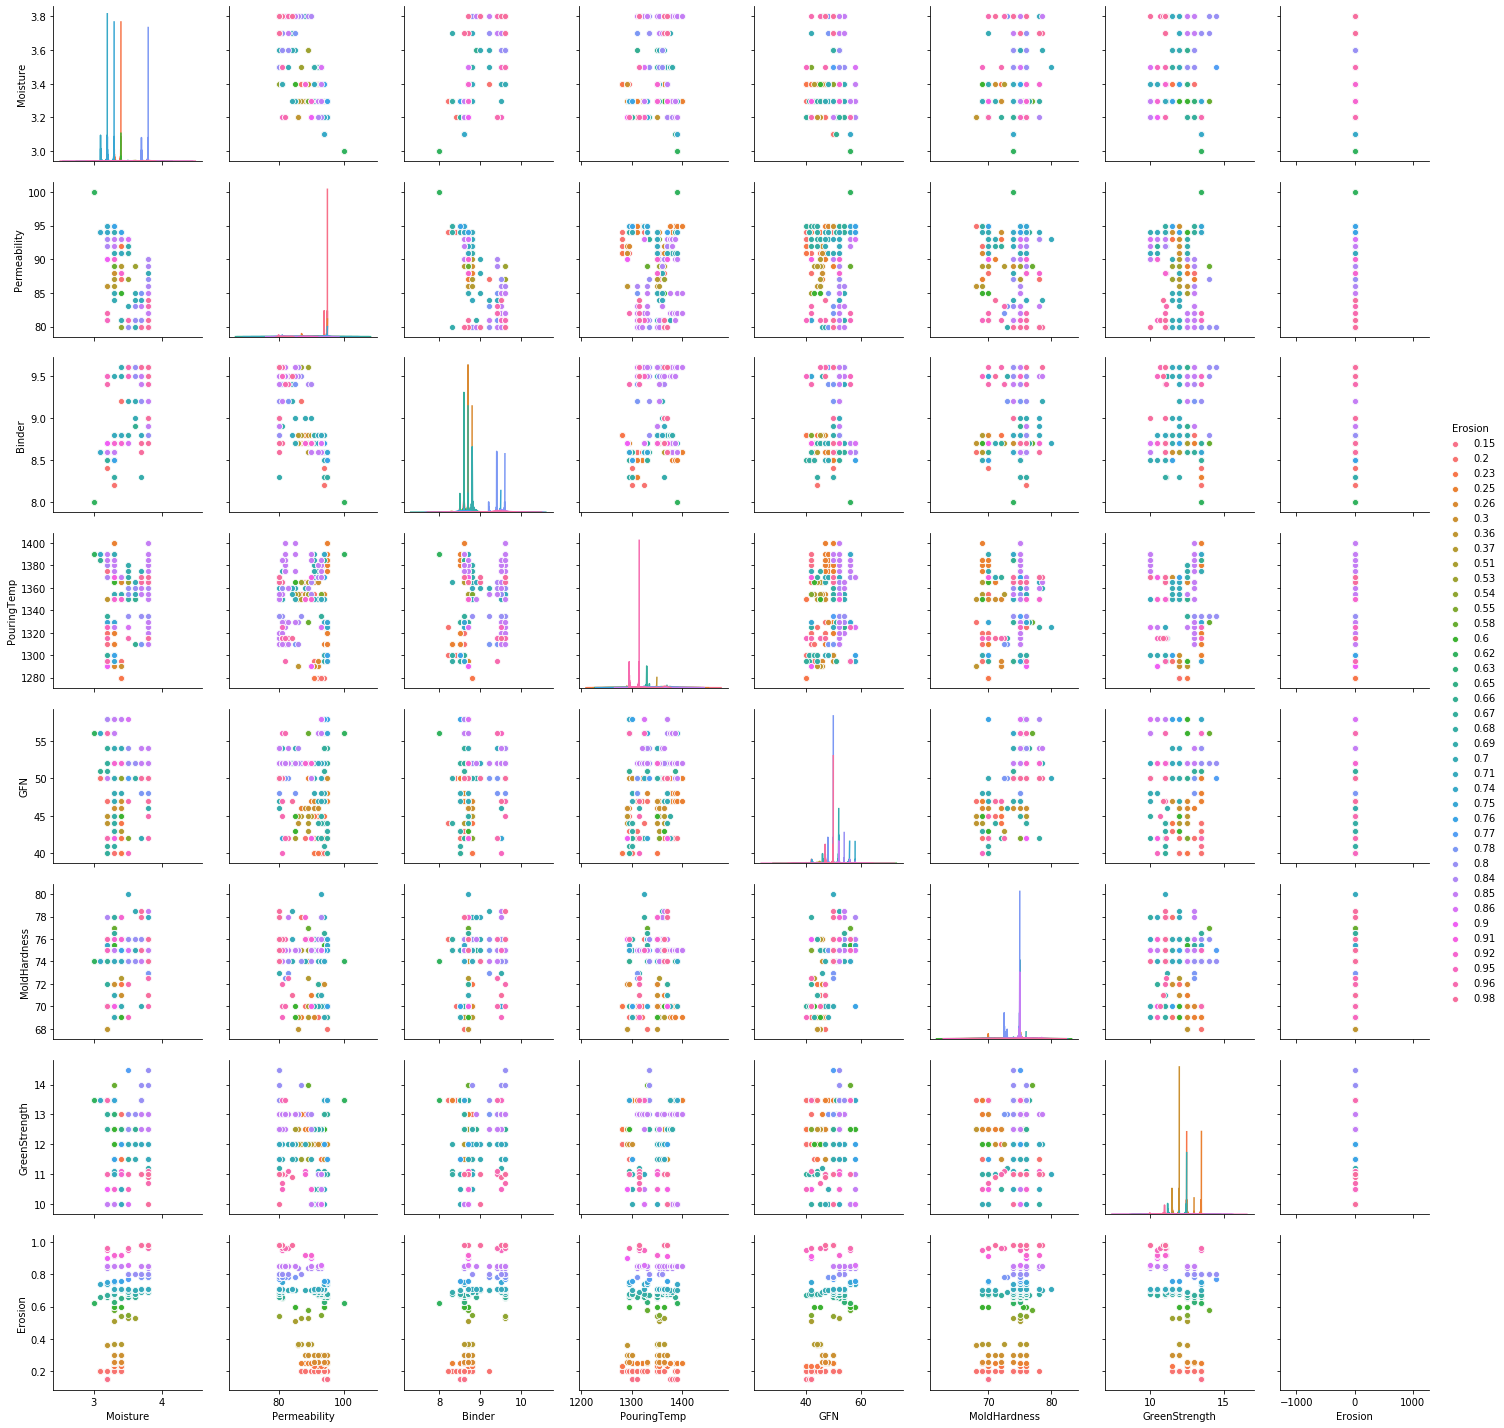

In [59]:
sns.pairplot(text_data,hue='Erosion')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(394, 7)
(99, 7)


In [61]:
from sklearn.ensemble import RandomForestRegressor
  
#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [62]:
accuracy_RandomForest = clf.score(X_test,y_test)
accuracy_RandomForest

0.9654176730161914

IMPORTANT FEATURE FOR EROSION

In [63]:
feature_names = ['Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN',
       'MoldHardness', 'GreenStrength']
print(feature_names)

['Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN', 'MoldHardness', 'GreenStrength']


In [64]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

GFN              0.420585
GreenStrength    0.255341
Permeability     0.220361
Moisture         0.086409
MoldHardness     0.008319
Binder           0.004664
PouringTemp      0.004321
dtype: float64

No handles with labels found to put in legend.


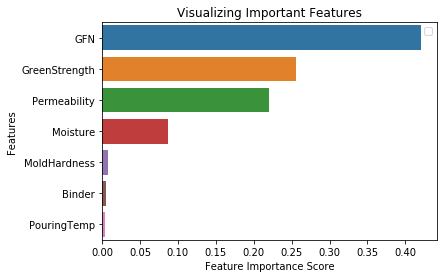

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

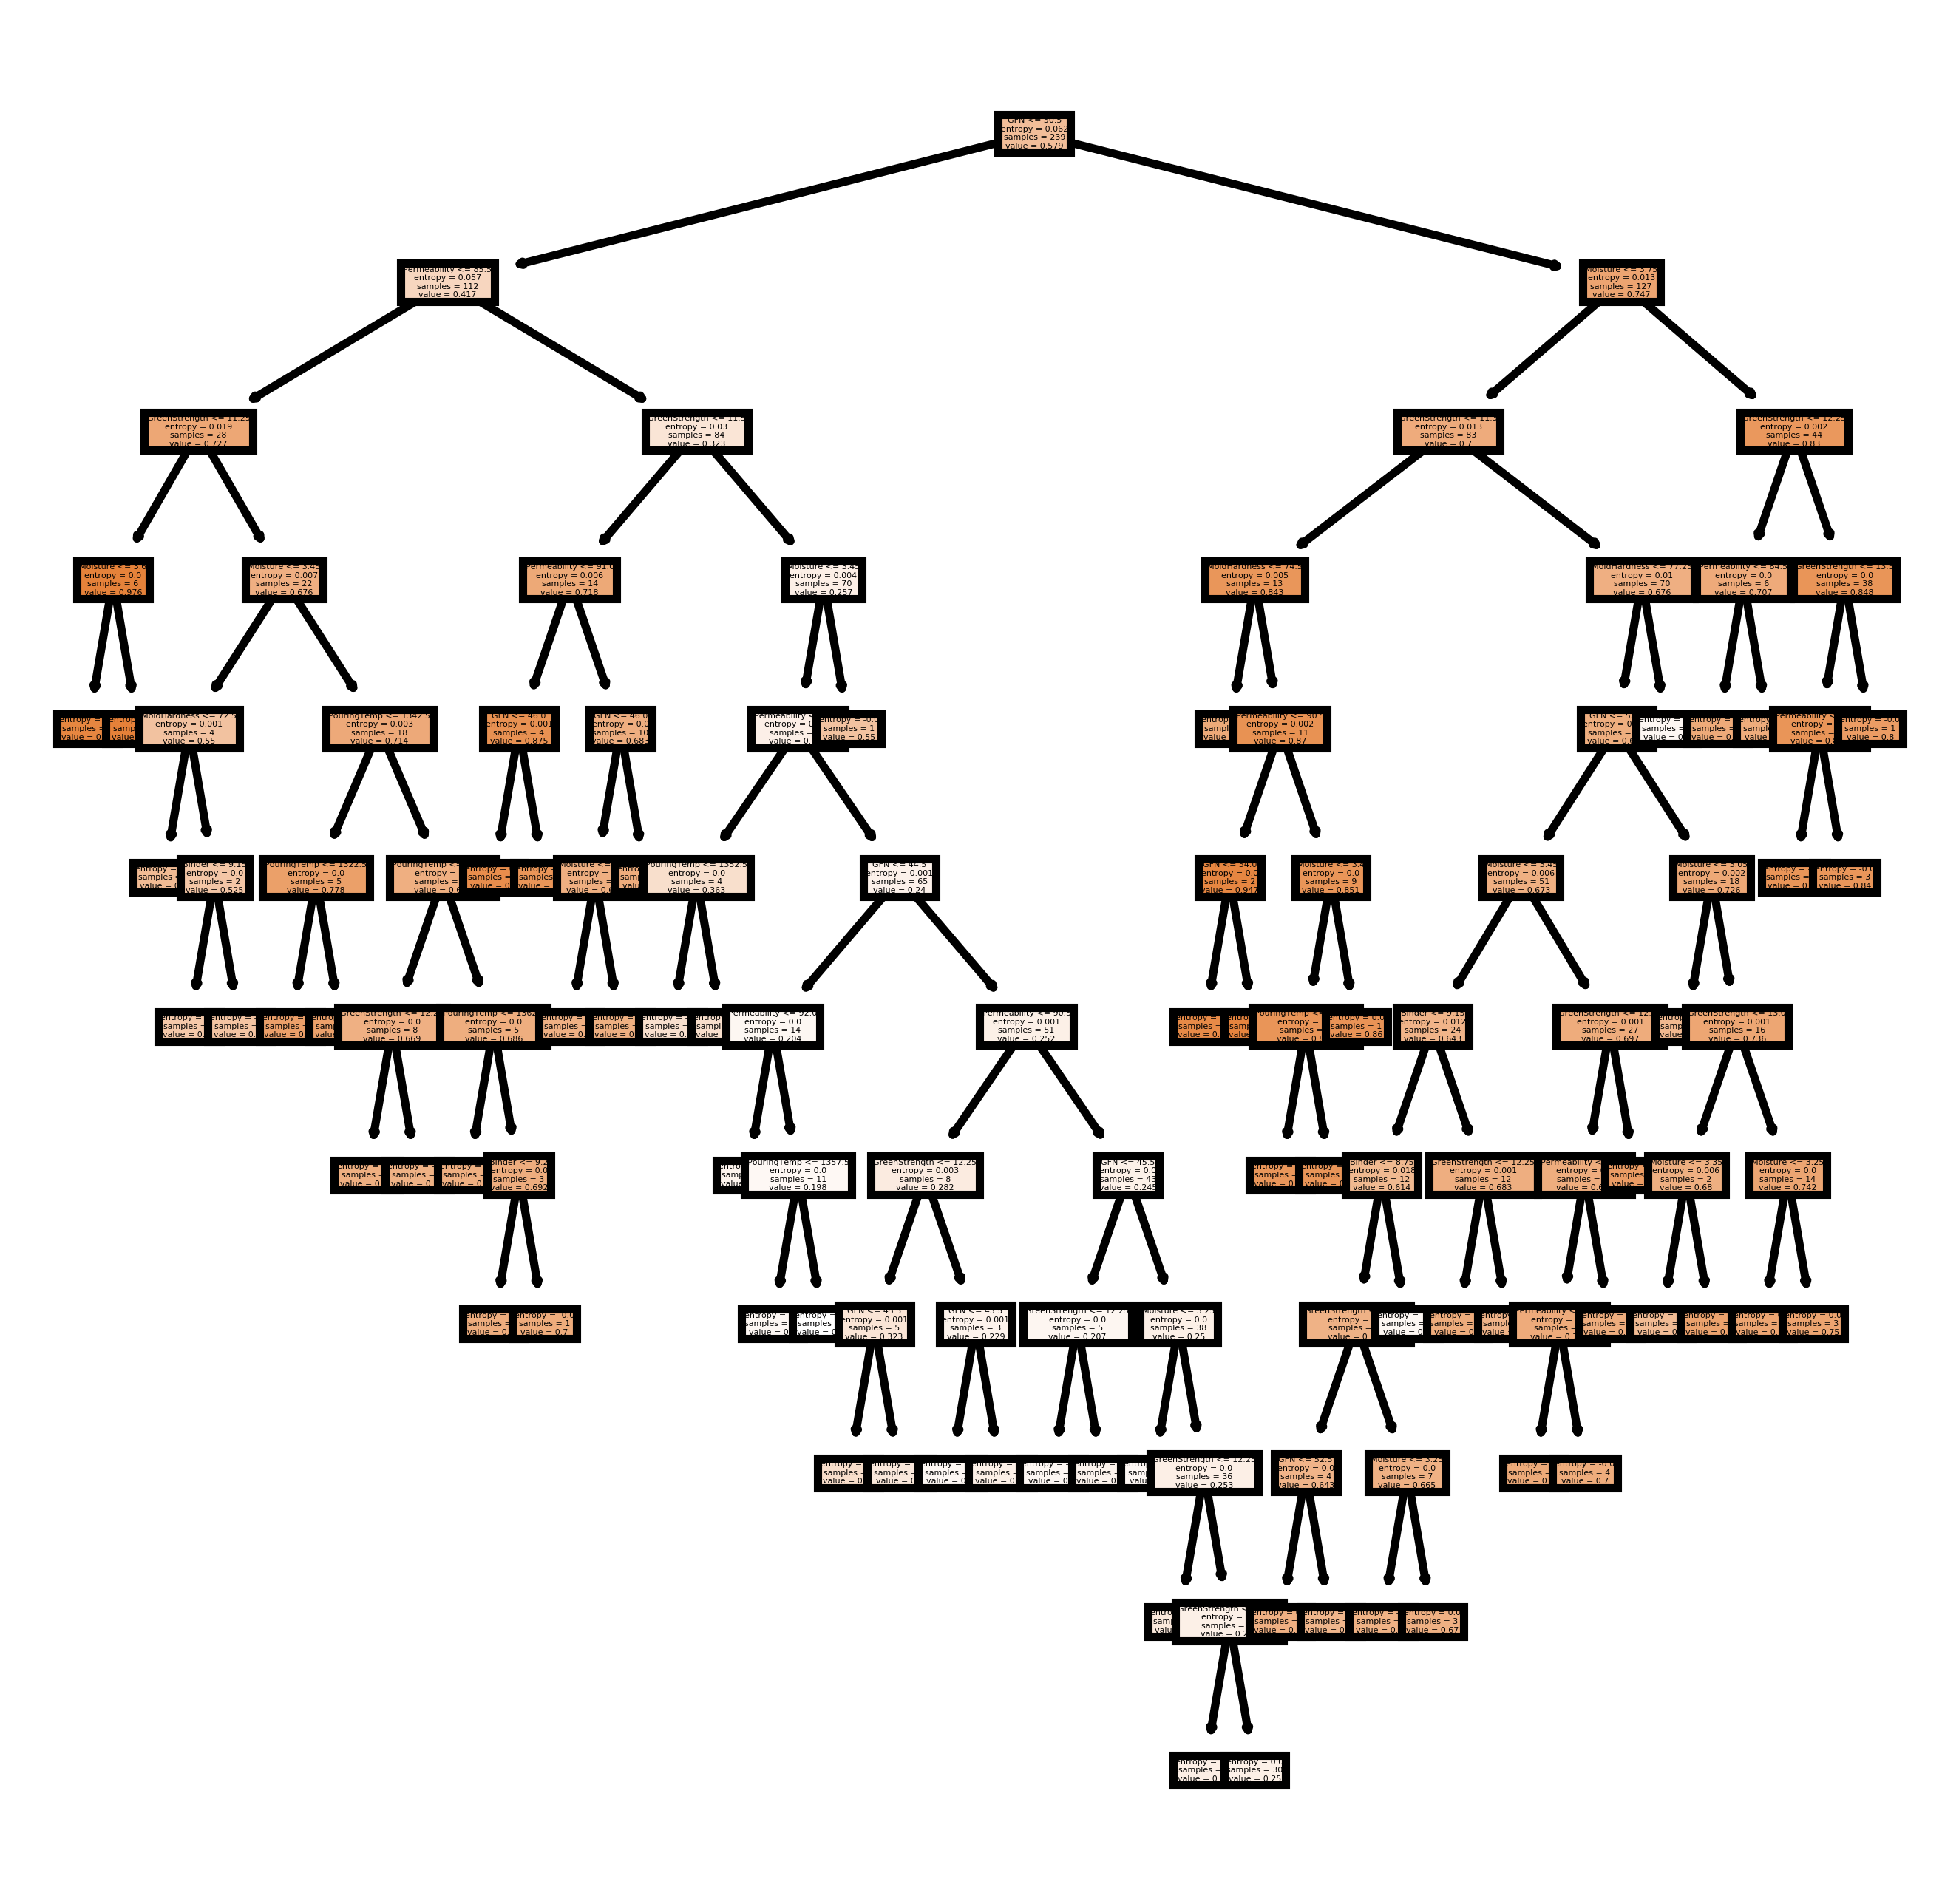

In [66]:
from sklearn import tree
estimator = clf.estimators_[5]
target= ['Penetra']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = feature_names, 
               class_names=target,
               filled = True);
fig.savefig('clf_individualtree.png')

In [67]:
prediction2 = clf.predict(X)
prediction2 =  prediction2.reshape(-1,1)
print(prediction2.shape)
# Get Unique_ID and similarity

final_score = pd.DataFrame(prediction2)
final_score.head(3) 
final_score.to_csv('final_score.csv',index=False)

(493, 1)


In [68]:
X.columns

Index(['Moisture', 'Permeability', 'Binder', 'PouringTemp', 'GFN',
       'MoldHardness', 'GreenStrength'],
      dtype='object')